In [11]:
def basic_analysis():
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np
    %matplotlib inline
    data_0 = pd.read_csv("/Users/jun/Documents/data/BTCETHLTC_USD.csv")
    n = data_0.shape[0]
    print( type(data_0) )
    print("row number:",n)
    print("columns", data_0.columns)
    print(data_0.loc[0])
    btc = data_0['last_trade_price_BTC']
    ltc = data_0['last_trade_price_LTC']
    eth = data_0['last_trade_price_ETH']
    plt.scatter(range(data_0.shape[0]), btc/eth)
    plt.show()
    print( 'Correlation', btc.corr(eth), eth.corr(btc) )
    return btc/eth

In [12]:
def dick_fuller_test(btc_eth_ratio):
    import numpy as np
    # unit root test?
    # refer to https://machinelearningmastery.com/time-series-data-stationary-python/
    # Augmented Dickey-Fuller test
    from statsmodels.tsa.stattools import adfuller
    result = adfuller(np.array( btc_eth_ratio )[:300] )
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    # null hypothesis: it has no unit root, so we can not reject
    # it is not stationary here

<class 'pandas.core.frame.DataFrame'>
('row number:', 88568)
('columns', Index([u'date', u'last_trade_price_BTC', u'vol_weighted_price_BTC',
       u'buy_weighted_price_BTC', u'sell_weighted_price_BTC',
       u'buy_amount_BTC', u'sell_amount_BTC', u'total_amount_BTC',
       u'last_trade_price_ETH', u'vol_weighted_price_ETH',
       u'buy_weighted_price_ETH', u'sell_weighted_price_ETH',
       u'buy_amount_ETH', u'sell_amount_ETH', u'total_amount_ETH',
       u'last_trade_price_LTC', u'vol_weighted_price_LTC',
       u'buy_weighted_price_LTC', u'sell_weighted_price_LTC',
       u'buy_amount_LTC', u'sell_amount_LTC', u'total_amount_LTC'],
      dtype='object'))
date                       2017-08-01T00:00:00Z
last_trade_price_BTC                    2855.59
vol_weighted_price_BTC                  2855.62
buy_weighted_price_BTC                  2856.91
sell_weighted_price_BTC                 2854.73
buy_amount_BTC                          3.62223
sell_amount_BTC                         5.

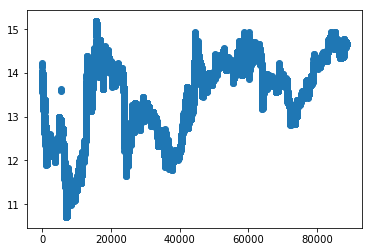

('Correlation', 0.8363241470220264, 0.8363241470220264)


In [13]:
btc_eth_ratio = basic_analysis()

In [4]:
dick_fuller_test(btc_eth_ratio)

ADF Statistic: -2.091787
p-value: 0.247830
Critical Values:
	5%: -2.871
	1%: -3.452
	10%: -2.572


/Users/jun/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
# #不考虑仓位分配
# #初始值 = 码金
# margin = 1
# initial_cash = margin
# initial_btc = 0
# initial_eth = 0
# position_cash = initial_cash
# position_btc = initial_btc
# position_eth = initial_eth
# res = 1
# n = data_0.shape[0]
# # mean = np.sum( btc_eth_ratio )/float(len( btc_eth_ratio ))
# mean = np.mean( btc_eth_ratio )
# std = np.std(btc_eth_ratio)
# position = 0
# position_hist = np.zeros(n)
# #data
# btc = data_0['last_trade_price_BTC']
# ltc = data_0['last_trade_price_LTC']
# eth = data_0['last_trade_price_ETH']
# for i in range(n):
#     if btc_eth_ratio[i] > mean + std and position != 1:
#         print('long eth short btc')
#         position_cash = position_cash + position_btc*btc[i] + position_eth*eth[i]
#         position_btc = -position_cash/btc[i]
#         position_eth = position_cash/eth[i]
#         position = 1
#     if btc_eth_ratio[i] < mean - std and position != -1:
#         print('long btc short eth')
#         position_cash = position_cash + position_btc*btc[i] + position_eth*eth[i]
#         position_btc = position_cash/btc[i]
#         position_eth = -position_cash/eth[i]
#         position = -1
#     position_hist[i] = position_cash + position_btc*btc[i] + position_eth*eth[i]
# res = position_cash + position_btc*btc[n-1] + position_eth*eth[n-1]
# print(res)

In [6]:
# import matplotlib.pyplot as plt
# plt.scatter(range(data_0.shape[0]),position_hist )
# plt.show()

In [17]:
import pandas as pd
data_0 = pd.read_csv("/Users/jun/Documents/data/BTCETHLTC_USD.csv")
btc = data_0['last_trade_price_BTC']
ltc = data_0['last_trade_price_LTC']
eth = data_0['last_trade_price_ETH']

In [14]:
data_0.columns

Index([u'date', u'last_trade_price_BTC', u'vol_weighted_price_BTC',
       u'buy_weighted_price_BTC', u'sell_weighted_price_BTC',
       u'buy_amount_BTC', u'sell_amount_BTC', u'total_amount_BTC',
       u'last_trade_price_ETH', u'vol_weighted_price_ETH',
       u'buy_weighted_price_ETH', u'sell_weighted_price_ETH',
       u'buy_amount_ETH', u'sell_amount_ETH', u'total_amount_ETH',
       u'last_trade_price_LTC', u'vol_weighted_price_LTC',
       u'buy_weighted_price_LTC', u'sell_weighted_price_LTC',
       u'buy_amount_LTC', u'sell_amount_LTC', u'total_amount_LTC'],
      dtype='object')

In [24]:
def pairs_trading_back_testing(btc,eth):
    import numpy as np
    btc_eth_ratio = btc/eth
    margin = 1
    initial_cash = margin
    initial_btc = 0
    initial_eth = 0
    position_cash = initial_cash
    position_btc = initial_btc
    position_eth = initial_eth
    res = 1
    n = data_0.shape[0]
    position = 0
    position_hist = np.zeros(n)
#     mean = np.mean( btc_eth_ratio)
#     std = np.std(btc_eth_ratio)
    for i in range(n):
        mean = np.mean( btc_eth_ratio[:i+1] )
        std = np.std(btc_eth_ratio[:i+1])
        if btc_eth_ratio[i] > mean + std and position != 1:
            print('long second short first')
            position_cash = position_cash + position_btc*btc[i] + position_eth*eth[i]
            position_btc = -position_cash/btc[i]
            position_eth = position_cash/eth[i]
            position = 1
        if btc_eth_ratio[i] < mean - std and position != -1:
            print('long first short second')
            position_cash = position_cash + position_btc*btc[i] + position_eth*eth[i]
            position_btc = position_cash/btc[i]
            position_eth = -position_cash/eth[i]
            position = -1
        position_hist[i] = position_cash + position_btc*btc[i] + position_eth*eth[i]
    res = position_cash + position_btc*btc[n-1] + position_eth*eth[n-1]
    print(res)
    import matplotlib.pyplot as plt
    plt.scatter(range(data_0.shape[0]),position_hist)
    plt.show()

long second short first
long first short second
long second short first
long first short second
long second short first
long first short second
1.94658654739


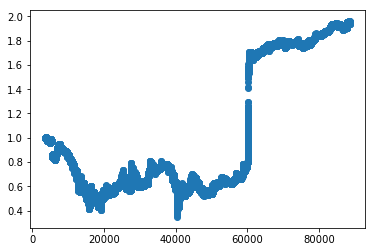

In [25]:
pairs_trading_back_testing(btc,ltc)

In [37]:
data_0.columns

Index([u'date', u'last_trade_price_BTC', u'vol_weighted_price_BTC',
       u'buy_weighted_price_BTC', u'sell_weighted_price_BTC',
       u'buy_amount_BTC', u'sell_amount_BTC', u'total_amount_BTC',
       u'last_trade_price_ETH', u'vol_weighted_price_ETH',
       u'buy_weighted_price_ETH', u'sell_weighted_price_ETH',
       u'buy_amount_ETH', u'sell_amount_ETH', u'total_amount_ETH',
       u'last_trade_price_LTC', u'vol_weighted_price_LTC',
       u'buy_weighted_price_LTC', u'sell_weighted_price_LTC',
       u'buy_amount_LTC', u'sell_amount_LTC', u'total_amount_LTC'],
      dtype='object')

In [38]:
btc_sell = data_0['sell_weighted_price_BTC']
btc_buy = data_0['buy_weighted_price_BTC']
ltc_sell = data_0['sell_weighted_price_LTC']
ltc_buy = data_0['buy_weighted_price_LTC']
eth_sell = data_0['sell_weighted_price_ETH']
eth_buy = data_0['buy_weighted_price_ETH']

In [59]:
n = 200
from pprint import pprint
pprint( zip( btc_sell[:n]- btc_buy[:n]) )

[(-2.1798458606958775,),
 (0.031094780141302181,),
 (-0.37591058591897308,),
 (-0.24191961801216166,),
 (-0.2286033340128597,),
 (-0.21221618150775612,),
 (-0.060741917824543634,),
 (1.9468730683129252,),
 (-1.1652687423302268,),
 (-0.20156228569658197,),
 (-0.2826275103629996,),
 (-0.029054007368358725,),
 (0.2517734760208441,),
 (-0.71831255773258817,),
 (-3.607112776185204,),
 (-0.63954250207098085,),
 (-3.1038598973855187,),
 (-0.45000538334579687,),
 (-0.0099999999997635314,),
 (-0.010000000000673026,),
 (-1.3931256947134898,),
 (nan,),
 (-1.8573736186895076,),
 (-0.99447345806129306,),
 (-0.089404321854090085,),
 (-2.3110351220843768,),
 (-7.63063867538267,),
 (-2.727133399889226,),
 (-4.3394140633781717,),
 (-5.164516386032119,),
 (-2.1123748656073076,),
 (-0.57975186365911213,),
 (-2.6067144282851586,),
 (-5.3078433182154185,),
 (nan,),
 (0.27826389025403842,),
 (-2.7411201071845426,),
 (-1.5566199738059368,),
 (-3.8945325873605725,),
 (1.5316034750967447,),
 (-4.58993200734266

In [64]:
def pairs_trading_back_testing_2(btc_sell, btc_buy, eth_sell, eth_buy):
    import numpy as np
    btc = (btc_sell+ btc_buy)/2
    eth = (eth_sell+ eth_buy)/2
    btc_eth_ratio = btc/eth
    margin = 1
    initial_cash = margin
    initial_btc = 0
    initial_eth = 0
    position_cash = initial_cash
    position_btc = initial_btc
    position_eth = initial_eth
    res = 1
    n = len(btc)
    position = 0
    position_hist = np.zeros(n)
# comission 
    commission_rate = 0.0025
#     mean = np.mean( btc_eth_ratio)
#     std = np.std(btc_eth_ratio)
    for i in range(n):
        if i%10000 == 1:
            print(i)
        mean = np.mean( btc_eth_ratio[:i+1] )
        std = np.std(btc_eth_ratio[:i+1])
        if btc_eth_ratio[i] > mean + std and position != 1:
            print('long second short first')
            position_cash = position_cash + position_btc*btc_buy[i] + position_eth*eth_sell[i]
            position_btc = -position_cash/btc_sell[i] * (1 + commission_rate)
            position_eth = position_cash/eth_buy[i] * (1- commission_rate)
            position = 1
        if btc_eth_ratio[i] < mean - std and position != -1:
            print('long first short second')
            position_cash = position_cash + position_btc*btc_sell[i] + position_eth*eth_buy[i]
            position_btc = position_cash/btc_buy[i] * (1- commission_rate)
            position_eth = -position_cash/eth_sell[i] * (1+ commission_rate)
            position = -1
        if position_btc < 0:
            position_hist[i] = position_cash + position_btc * btc_buy[i] * (1 + commission_rate)
            + position_eth * eth_sell[i] * (1- commission_rate)
        else:
            position_hist[i] = position_cash + position_btc * btc_sell[i] * (1 - commission_rate) 
            + position_eth * eth_buy[i] * (1 + commission_rate)
    res = position_hist[-1]
    print(res)
    import matplotlib.pyplot as plt
    plt.scatter(range(data_0.shape[0]),position_hist)
    plt.show()

1
long first short second
long second short first
long first short second
long second short first
long first short second
10001
long second short first
20001
long first short second
30001
40001
long second short first
50001
60001
70001
80001
[ 1.         1.         1.        ...,  0.0355251  0.0355251  0.0355251]


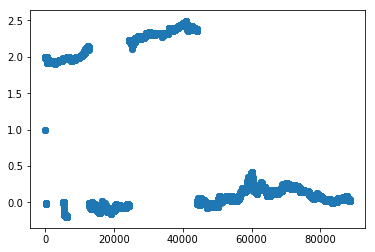

In [65]:
pairs_trading_back_testing_2(btc_sell,btc_buy,eth_sell, eth_buy)

In [63]:
len(btc)

88568